In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
columns = ['normalising_temperature','tempering_temperature','sample','percent_silicon','percent_chromium','manufacture_year','percent_copper','percent_nickel','percent_sulphur','percent_carbon','percent_manganese','tensile_strength']

steel_df = pd.read_csv('steel.txt',sep='\t',header = None)

In [3]:
steel_df.columns = columns
steel_df.describe()

,normalising_temperature,tempering_temperature,sample,percent_silicon,percent_chromium,manufacture_year,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,478.205222,752.124774,572.600362,0.063890,1.277492,2000.761302,0.784018,0.972592,0.059302,1.817157,0.577192,192.048148
std,162.317845,259.220817,272.342245,0.080655,0.260280,6.415630,0.068589,0.074270,0.055396,0.185422,0.623316,91.134383
min,178.500000,225.000000,1.000000,0.000000,0.745783,1990.000000,0.594000,0.801000,0.000000,1.378000,0.000000,12.824943
25%,382.987500,550.000000,340.000000,0.000000,1.065888,1995.000000,0.753450,0.932000,0.000000,1.680800,0.000000,126.201687
50%,465.850000,900.000000,578.000000,0.000000,1.286314,2001.000000,0.784000,0.968000,0.061000,1.857000,0.244600,182.556353
75%,570.500000,900.000000,795.000000,0.129800,1.492220,2007.000000,0.830000,1.028100,0.101000,1.920000,1.175400,245.501719
max,945.000000,950.000000,1030.000000,0.359400,1.794173,2011.000000,0.945000,1.125000,0.322000,2.470000,1.950000,454.295736


In [4]:
from sklearn.preprocessing import MinMaxScaler
tensile_strength_scaler = MinMaxScaler()
steel_df['tensile_strength'] = tensile_strength_scaler.fit_transform(steel_df['tensile_strength'].values.reshape(-1,1))
steel_df.head(5)

,normalising_temperature,tempering_temperature,sample,percent_silicon,percent_chromium,manufacture_year,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
0,178.500,275,653,0.1530,0.970575,1998,0.942,0.8870,0.0,1.920,0.0,0.027822
1,178.500,950,654,0.1530,1.212726,2010,0.942,0.8870,0.0,1.920,0.0,0.288151
2,178.500,375,678,0.1530,1.621165,1992,0.942,0.8870,0.0,1.920,0.0,0.066579
3,178.500,900,681,0.1530,0.809989,1991,0.942,0.8870,0.0,1.920,0.0,0.186174
4,189.525,900,658,0.1624,1.036229,2009,0.849,0.9382,0.0,2.035,0.0,0.227516


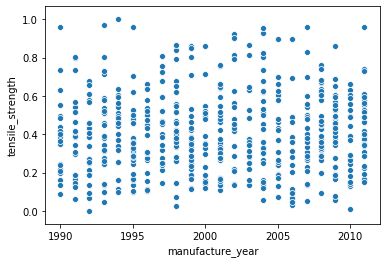

In [5]:
sns.scatterplot(x='manufacture_year',y='tensile_strength',data = steel_df)

## After scaling Y variable checking if there is any skewness in the distribution bcz our model tends influenced by skewness

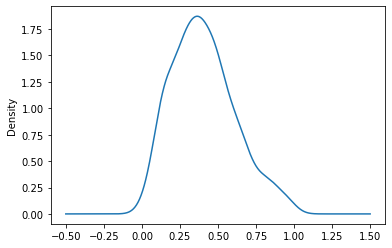

In [6]:
steel_df['tensile_strength'].plot.kde()

# No relation between manufacture year and tensile strength and also sample id has nothing to do with tensile strength

In [7]:
steel_df = steel_df.drop(columns=['manufacture_year','sample'])
steel_df.head(5)

,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
0,178.500,275,0.1530,0.970575,0.942,0.8870,0.0,1.920,0.0,0.027822
1,178.500,950,0.1530,1.212726,0.942,0.8870,0.0,1.920,0.0,0.288151
2,178.500,375,0.1530,1.621165,0.942,0.8870,0.0,1.920,0.0,0.066579
3,178.500,900,0.1530,0.809989,0.942,0.8870,0.0,1.920,0.0,0.186174
4,189.525,900,0.1624,1.036229,0.849,0.9382,0.0,2.035,0.0,0.227516


In [8]:
#Automatic Backward Elimination with p-values only:
x = steel_df.iloc[:,[0,1,2,4,5,7,8]].values
y = steel_df.iloc[:,9].values


import statsmodels.api as sm
x_dummy = x
x_dummy = sm.add_constant(x_dummy)
regressor_OLS = sm.OLS(y,x_dummy).fit()
c = ['const']
c.extend(steel_df.columns[[0,1,2,4,5,7,8]].tolist())
regressor_OLS.summary(xname =c)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     315.5
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          4.34e-187
Time:                        20:00:12   Log-Likelihood:                 536.22
No. Observations:                 553   AIC:                            -1056.
Df Residuals:                     545   BIC:                            -1022.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3671      0.333     -4.102      0.000      -2.022      -0.712
normalising_temperature     0.0011   6.27e-05     17.006      0.000       0.001       0.001
tempering_temperature       0.0005   1.56e-05     29.542      0.000       0.000       0.000
percent_silicon             1.5870      0.128     12.439      0.000       1.336       1.838
percent_copper              0.6123      0.139      4.402      0.000       0.339       0.886
percent_nickel              0.5979      0.118      5.061      0.000       0.366       0.830
percent_carbon             -0.1744      0.046     -3.821      0.000      -0.264      -0.085
percent_manganese           0.1220      0.016      7.872      0.000       0.092       0.152
==============================================================================
Omnibus:                        0.399   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.402
Skew:                           0.065   Prob(JB):                        0.818
Kurtosis:                       2.976   Cond. No.                     9.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

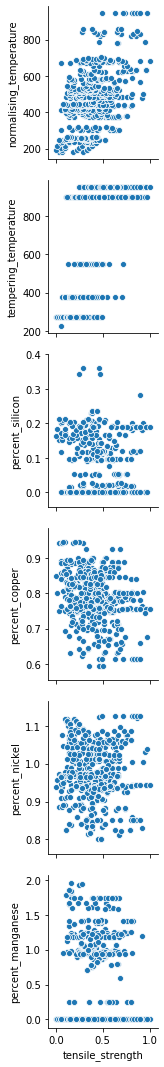

In [9]:
sns.pairplot(steel_df,x_vars=['tensile_strength'],y_vars=steel_df.columns[[0,1,2,4,5,8]])


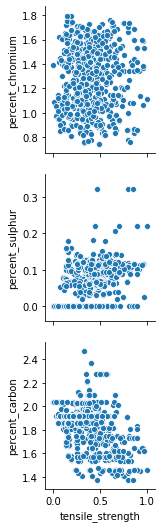

In [10]:
sns.pairplot(steel_df,x_vars=['tensile_strength'],y_vars=steel_df.columns[[3,6,7]])


In [11]:
steel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 10 columns):
normalising_temperature    553 non-null float64
tempering_temperature      553 non-null int64
percent_silicon            553 non-null float64
percent_chromium           553 non-null float64
percent_copper             553 non-null float64
percent_nickel             553 non-null float64
percent_sulphur            553 non-null float64
percent_carbon             553 non-null float64
percent_manganese          553 non-null float64
tensile_strength           553 non-null float64
dtypes: float64(9), int64(1)
memory usage: 43.3 KB


In [12]:
steel_df.describe()

,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,478.205222,752.124774,0.063890,1.277492,0.784018,0.972592,0.059302,1.817157,0.577192,0.405968
std,162.317845,259.220817,0.080655,0.260280,0.068589,0.074270,0.055396,0.185422,0.623316,0.206434
min,178.500000,225.000000,0.000000,0.745783,0.594000,0.801000,0.000000,1.378000,0.000000,0.000000
25%,382.987500,550.000000,0.000000,1.065888,0.753450,0.932000,0.000000,1.680800,0.000000,0.256816
50%,465.850000,900.000000,0.000000,1.286314,0.784000,0.968000,0.061000,1.857000,0.244600,0.384468
75%,570.500000,900.000000,0.129800,1.492220,0.830000,1.028100,0.101000,1.920000,1.175400,0.527049
max,945.000000,950.000000,0.359400,1.794173,0.945000,1.125000,0.322000,2.470000,1.950000,1.000000


In [13]:
cor_df = steel_df.corr()

cor_df[(cor_df > 0.70) | (cor_df < -0.70)]

,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
normalising_temperature,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempering_temperature,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_silicon,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_chromium,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
percent_copper,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
percent_nickel,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
percent_sulphur,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
percent_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
percent_manganese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
tensile_strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

def get_metrics(y_test,y_pred):
    r2 = r2_score(y_test, y_pred)
    n = len(x_train)
    k = x_train.shape[1]
    aj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print('RMSE   : {:.3f}\n\nMAE    : {:.3f}\n\nR2     : {:.3f}\n\nAjd R2 : {:.3f}'.format(rmse,mae,r2,aj_r2))
def get_adj_r2_frm_r2(r2):
    n = len(x_train)
    k = x_train.shape[1]
    aj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    return aj_r2
    

# Random Forest

Impurity = MSE

Value at each node is average of the y values in that data subset.

Here we split a data based on threshold and then we calculate mse = 1/n sum(y_act - y_pred)2 (measuring homogenity by variance)

Best split threshold gives us the best minimum overall mse

here y_act is the actual data point
     y_pred is the average of all actual data points in that group.
     
Spliting stops when

    - We have only one data point in a node
    - When all the data points in the node have same value (i.e = same as average)
    - Min sample per slipt

In [15]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 50, random_state = 0,criterion='mse',max_features = 5,min_samples_split = 3)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [16]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_rf = cross_val_score(estimator = regressor_rf, X = x_train, y = y_train, cv = 10,scoring='r2')
np.sqrt(accuracies_rf.mean())

0.9254537071994217

In [17]:
y_pred_rf = regressor_rf.predict(x_test)
get_metrics(y_test,y_pred_rf)

RMSE   : 0.081

MAE    : 0.057

R2     : 0.866

Ajd R2 : 0.863


## Decision Tree 

In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state=0,min_samples_split = 3,max_leaf_nodes = 40,max_depth = 13)
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
                      max_leaf_nodes=40, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [19]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_dt = cross_val_score(estimator = regressor_dt, X = x_train, y = y_train, cv = 10,scoring='r2')
np.sqrt(accuracies_dt.mean())

0.844215092437075

In [20]:
y_pred_dt = regressor_dt.predict(x_test)
get_metrics(y_test,y_pred_dt)

RMSE   : 0.101

MAE    : 0.077

R2     : 0.789

Ajd R2 : 0.785


# Standard scaler ( Models below take in scaled inputs) 

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(x_train)

X_test = sc_X.transform(x_test)


# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
accuracies_xg = cross_val_score(estimator = regressor_lr, X = X_train, y = y_train, cv = 10,scoring='r2')
np.sqrt(accuracies_xg.mean())

0.8712404355641192

In [24]:
y_pred_lr = regressor_lr.predict(X_test)
get_metrics(y_test,y_pred_lr)

RMSE   : 0.092

MAE    : 0.076

R2     : 0.826

Ajd R2 : 0.823


## Ridge regression

In [25]:
from sklearn import linear_model

regressor_ridge = linear_model.Ridge(alpha = 0.05)
regressor_ridge.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
y_pred_ridge = regressor_ridge.predict(x_test)
get_metrics(y_test,y_pred_ridge)

RMSE   : 0.092

MAE    : 0.076

R2     : 0.826

Ajd R2 : 0.823


# SVR

Similar to SVM used for classification here we use Kernel trick to project the data into higher dimensional space to get separability.

Kernels available are - polynomial,gaussian (rbf) ,sigmoid etc

In regression we limit the error rate by defining a threshold called epsilon.

That is the  boundry line above and below comprises of data points that accounts for variablity explained by hyper plane.

We ignore points that are outside our decision boundry.

https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff

In [27]:


# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf',epsilon =0.001,C=2,gamma=0.1)
regressor_svr.fit(X_train, y_train)

# Predicting a new result


SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_svr = cross_val_score(estimator = regressor_svr, X = X_train, y = y_train, cv = 10,scoring='r2')
np.sqrt(accuracies_svr.mean())

0.9166639996837802

In [29]:
y_pred_svm = regressor_svr.predict(X_test)
get_metrics(y_test,y_pred_svm)

RMSE   : 0.075

MAE    : 0.053

R2     : 0.886

Ajd R2 : 0.883


# KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor(n_neighbors = 5,weights='distance',p=2)
regressor_knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [31]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_knn = cross_val_score(estimator = regressor_knn, X = X_train, y = y_train, cv = 10,scoring='r2')
np.sqrt(accuracies_knn.mean())

0.8969298015346291

In [32]:
y_pred_knn = regressor_knn.predict(X_test)
get_metrics(y_test,y_pred_knn)

RMSE   : 0.086

MAE    : 0.060

R2     : 0.850

Ajd R2 : 0.847


# XGBOOST

In [33]:
from xgboost import XGBRegressor
regressor_xg = xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.65,
                           colsample_bytree=0.8, max_depth=6) 

regressor_xg.fit(X_train, y_train)


[20:00:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.65, verbosity=1)

In [34]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_xg = cross_val_score(estimator = regressor_xg, X = X_train, y = y_train, cv = 10,scoring='r2')
get_adj_r2_frm_r2(np.sqrt(accuracies_xg.mean()))


[20:00:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

0.9454826354733932

In [35]:
y_pred_xg = regressor_xg.predict(X_test)
get_metrics(y_test,y_pred_xg)

RMSE   : 0.067

MAE    : 0.046

R2     : 0.907

Ajd R2 : 0.906


## Gradient Boosting

 Deision tree split logic same as explained in Random forest.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_gb = GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=75,max_depth = 5,max_features = 4,max_leaf_nodes=30,random_state = 10)
regressor_gb.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=4, max_leaf_nodes=30,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=75,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_gb = cross_val_score(estimator = regressor_gb, X = X_train, y = y_train, cv = 10,scoring='r2')
get_adj_r2_frm_r2(np.sqrt(accuracies_gb.mean()))

0.9335823773738117

In [38]:
y_pred_gb = regressor_gb.predict(X_test)
get_metrics(y_test,y_pred_gb)

RMSE   : 0.066

MAE    : 0.044

R2     : 0.911

Ajd R2 : 0.909


## MLP

In [39]:
from sklearn.neural_network import MLPRegressor


regressor_mlp = MLPRegressor(hidden_layer_sizes=(2,),activation = 'logistic',solver='lbfgs',alpha = 0.01,random_state = 33330,tol = 0.001)
regressor_mlp.fit(X_train,y_train)

MLPRegressor(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(2,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=33330, shuffle=True, solver='lbfgs', tol=0.001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_mlp = cross_val_score(estimator = regressor_mlp, X = X_train, y = y_train, cv = 10,scoring='r2')
np.sqrt(accuracies_mlp.mean())

0.8737030152895713

In [41]:
y_pred_mlp = regressor_mlp.predict(X_test)
get_metrics(y_test,y_pred_mlp)

RMSE   : 0.089

MAE    : 0.073

R2     : 0.839

Ajd R2 : 0.836


In [42]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

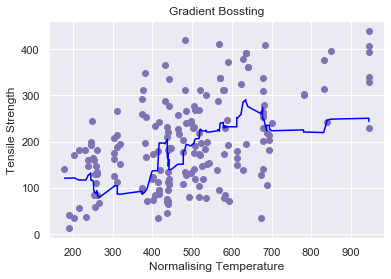

In [43]:
plt.scatter(sc_X.inverse_transform(X_test)[:,0],tensile_strength_scaler.inverse_transform(y_test.reshape(-1,1)),color = 'm')
plt.plot(np.sort(sc_X.inverse_transform(X_test), axis=0)[:,0],tensile_strength_scaler.inverse_transform(regressor_gb.predict(np.sort(X_test, axis=0)).reshape(-1,1)),color = 'blue')
plt.title('Gradient Bossting')
plt.xlabel('Normalising Temperature')
plt.ylabel('Tensile Strength')
plt.rcParams["figure.figsize"] = (8,6)


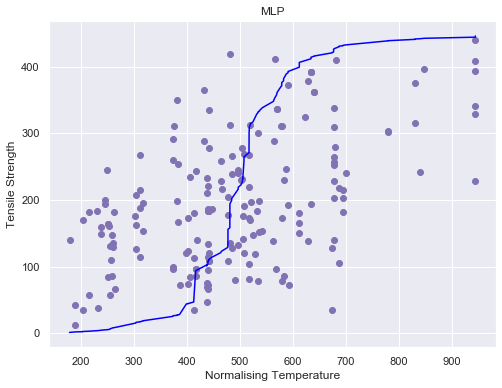

In [44]:
plt.scatter(sc_X.inverse_transform(X_test)[:,0],tensile_strength_scaler.inverse_transform(y_test.reshape(-1,1)),color = 'm')
plt.plot(np.sort(sc_X.inverse_transform(X_test), axis=0)[:,0],tensile_strength_scaler.inverse_transform(regressor_mlp.predict(np.sort(X_test, axis=0)).reshape(-1,1)),color = 'blue')
plt.title('MLP')
plt.xlabel('Normalising Temperature')
plt.ylabel('Tensile Strength')
plt.rcParams["figure.figsize"] = (8,6)

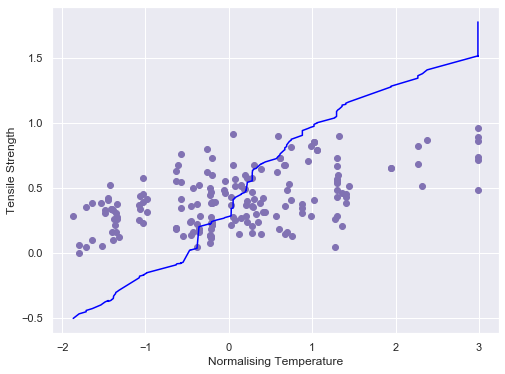

In [45]:
sorted_x = np.sort((X_test), axis=0)
plt.scatter(X_test[:,0],y_test,color = 'm')
plt.plot(sorted_x[:,0],regressor_lr.predict(sorted_x),color = 'blue') #Linear Regression
plt.xlabel('Normalising Temperature')
plt.ylabel('Tensile Strength')
plt.rcParams["figure.figsize"] = (8,6)

In [46]:
max(tensile_strength_scaler.inverse_transform(regressor_lr.predict(np.sort(X_test, axis=0)).reshape(-1,1)).tolist())

[798.5215025508616]